Megha Shakya
 - Aayusha Lamichhane
 - 


DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [4]:
mushrooms_df.head()
mushrooms_df.columns

Index(['type', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [64]:
#Encode the data 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


y = mushrooms_df['type']
X = mushrooms_df.drop(columns = 'type')

labEnc = LabelEncoder()
y_trans = labEnc.fit_transform(y)
label_names = labEnc.classes_

# Ordinal : population, ring number, gill-size, gill-spacing
ord_features = ['gill_size', 'ring_number', 'population', 'gill_spacing','bruises','stalk_shape','gill_attachment']
ordEnc = OrdinalEncoder(categories = [['b','n'],['n','o','t'],['a','c','n','s','v','y'],['c','w','d'],['t' ,'f'],['e','t'],['f','a']])

# Categorical
cat_features = ['cap_shape', 'cap_surface', 'cap_color', 'odor','gill_color', 
                'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 
                'stalk_color_below_ring', 'veil_color', 'veil_type', 'ring_type', 'spore_print_color','habitat']
hotEnc = OneHotEncoder()

# ColumnTransformer
ct = ColumnTransformer([
    ('hot', hotEnc, cat_features),
    ('ord', ordEnc, ord_features),
],
                       remainder = 'passthrough',
                       verbose_feature_names_out=False
                       )

X_trans = ct.fit_transform(X)
X_trans


<8124x105 sparse matrix of type '<class 'numpy.float64'>'
	with 151078 stored elements in Compressed Sparse Row format>

In [65]:
# Get column names
feature_names = ct.get_feature_names_out()

# Turn the transformed array into a DataFrame
X_trans_df = pd.DataFrame(X_trans.toarray(), columns=feature_names)

# Show the first few rows
X_trans_df.head()

,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,cap_surface_y,...,habitat_p,habitat_u,habitat_w,gill_size,ring_number,population,gill_spacing,bruises,stalk_shape,gill_attachment
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0


In [66]:
# Fit a model using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans)

tree_params = {'max_depth':[2, 4, 6, 8,10],
               'min_samples_split': [5, 10, 20]}

tree_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_clf, 
                   param_grid = tree_params, 
                   cv = 5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [5, 10, 20]})

In [67]:
tree_clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 5)

tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

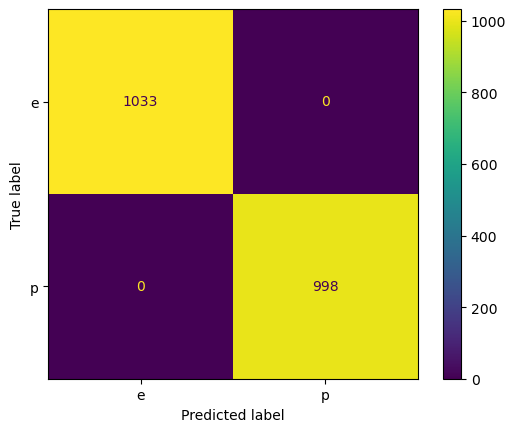

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


cfm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cfm, display_labels = label_names).plot()
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

In [69]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
# The parameters to search over
log_params = {'C': [0.01, 0.1, 1, 10, 100]}

log_clf = LogisticRegression(max_iter=1000)

# Setting up the search grid
log_grid = GridSearchCV(log_clf, param_grid=log_params, cv=5)

log_grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [70]:
#Using the best parameter to fit the model which is C =1
model_log = LogisticRegression(C=1, max_iter=1000)
model_log.fit(X_train, y_train)

y_pred_train_log = model_log.predict(X_train)
y_pred_log = model_log.predict(X_test)


y_pred_prob = model_log.predict_proba(X_test)

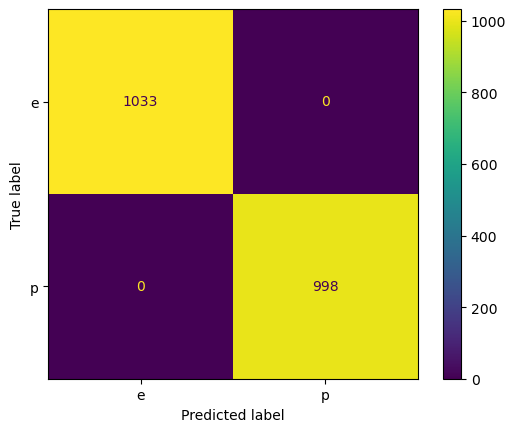

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [71]:
cfm = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cfm, display_labels = label_names).plot()
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))

In [72]:
#Using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Parameters to search over
randomforest_params = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, 8]
}

# Create the Random Forest model
randomforest_clf = RandomForestClassifier(random_state=42)
randomforest_grid = GridSearchCV(randomforest_clf, param_grid=randomforest_params, cv=5)

# Fit to training data
randomforest_grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'n_estimators': [50, 100]})

In [73]:
model_randomforest = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42)
# Train the model
model_randomforest.fit(X_train, y_train)

# Make predictions
y_pred_train_randomforest = model_randomforest.predict(X_train)
y_pred_randomforest = model_randomforest.predict(X_test)


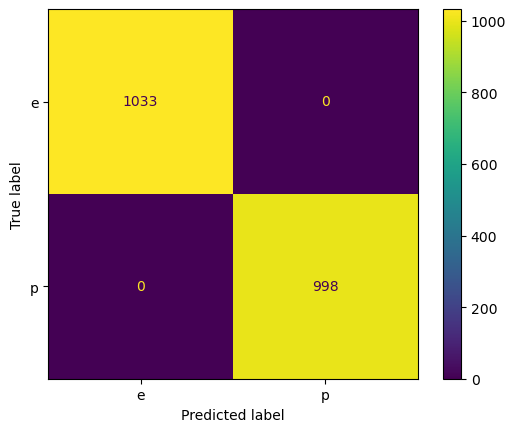

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [74]:
cfm = confusion_matrix(y_test, y_pred_randomforest)
ConfusionMatrixDisplay(cfm, display_labels = label_names).plot()
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_randomforest))
print("Precision:", precision_score(y_test, y_pred_randomforest))
print("Recall:", recall_score(y_test, y_pred_randomforest))


### Problem 1 questions

 - Which model was best?

 - What were the hyper-parameters of this model.

 - What were the accuracy, recall, and precision of the model.

 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: All three models were the same.
- Hyper-parameters: 
- Metrics
    - Accuracy: 1
    - Recall: 1
    - Precision: 1
- How did you decide best? 

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [41]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

In [42]:
nfl_draft.head()
nfl_draft.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2303 non-null   int64  
 1   round               2303 non-null   int64  
 2   season              2303 non-null   int64  
 3   name                2303 non-null   object 
 4   age                 2262 non-null   float64
 5   position            2303 non-null   object 
 6   college_conference  1471 non-null   object 
 7   height              2303 non-null   float64
 8   weight              2303 non-null   float64
 9   forty               2134 non-null   float64
 10  vertical            1832 non-null   float64
 11  broad_jump          1811 non-null   float64
 12  cone                1340 non-null   float64
 13  shuttle             1383 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 252.0+ KB


In [43]:
nfl_draft['college_conference'].unique()

array([nan, 'Big Twelve Conference', 'Pacific Ten Conference',
       'Mid-Eastern Athletic Conference', 'Atlantic Coast Conference',
       'Southeastern Conference', 'Big Sky Conference', 'Big East',
       'Sun Belt Conference', 'Big Ten Conference', 'Independent',
       'Pacific Twelve Conference', 'Ivy League',
       'Colonial Athletic Association', 'Ohio Valley Conference',
       'Mid-American Conference', 'Western Athletic Conference',
       'Conference USA', 'Mountain West Conference',
       'Southland Conference', 'American Athletic Conference',
       'Southern Conference', 'Gulf South Conference',
       'Big South Conference',
       'Mid-America Intercollegiate Athletic Association',
       'Great American Conference',
       'Pennsylvania State Athletic Conference',
       'Northern Sun Intercollegiate Conference',
       'Missouri Valley Football Conference', 'South Atlantic Conference',
       'NO COLLEGE', 'Great Lakes Intercollegiate Athletic Conference',
       

In [44]:
nfl_draft['draft_day'] = None
nfl_draft.loc[nfl_draft['round'] == 1, 'draft_day'] = 0
nfl_draft.loc[nfl_draft['round'].isin([2, 3]), 'draft_day'] = 1
nfl_draft.loc[nfl_draft['round'].isin([4, 5, 6, 7]), 'draft_day'] = 2


In [45]:
nfl_draft.head()
nfl_draft['draft_day'].unique()

array([0, 1, 2], dtype=object)

In [46]:

nfl_draft = nfl_draft.drop(columns = ['round', 'Unnamed: 0', 'name'])
nfl_draft.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              2303 non-null   int64  
 1   age                 2262 non-null   float64
 2   position            2303 non-null   object 
 3   college_conference  1471 non-null   object 
 4   height              2303 non-null   float64
 5   weight              2303 non-null   float64
 6   forty               2134 non-null   float64
 7   vertical            1832 non-null   float64
 8   broad_jump          1811 non-null   float64
 9   cone                1340 non-null   float64
 10  shuttle             1383 non-null   float64
 11  draft_day           2303 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 216.0+ KB


In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = nfl_draft.drop(columns = 'draft_day')
y = nfl_draft['draft_day']

# Encoding categorical and numeric features
cat_features = ['position', 'college_conference']
num_features = ['height', 'weight', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle', 'age', 'season']

hotEnc = OneHotEncoder(sparse_output=False)
ss = StandardScaler()
# ColumnTransformer
ct = ColumnTransformer([
    ('hot', hotEnc, cat_features),
    ('num', ss, num_features),
],
                       remainder = 'passthrough',
                       verbose_feature_names_out=False
                       )

X_trans = ct.fit_transform(X)
    
labEnc = LabelEncoder()
y_trans = labEnc.fit_transform(y)
label_names = labEnc.classes_

In [54]:
print(X_trans.shape)

(2303, 47)


In [55]:
print(y_trans.shape)

(2303,)


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.2, random_state=42)


#Using Random Forest

# Parameters to search over
randomforest_params = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, 8]
}

# Create the Random Forest model
randomforest_clf = RandomForestClassifier(random_state=42)
randomforest_grid = GridSearchCV(randomforest_clf, param_grid=randomforest_params, cv=5)

# Fit to training data
randomforest_grid.fit(X_train, y_train)

print("Best Parameters:", randomforest_grid.best_params_)



Best Parameters: {'max_depth': 8, 'n_estimators': 100}


In [52]:
X_train

<1842x47 sparse matrix of type '<class 'numpy.float64'>'
	with 20262 stored elements in Compressed Sparse Row format>

In [57]:
model_randomforest = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
# Train the model
model_randomforest.fit(X_train, y_train)

# Make predictions
y_pred_train = model_randomforest.predict(X_train)
y_pred_test= model_randomforest.predict(X_test)




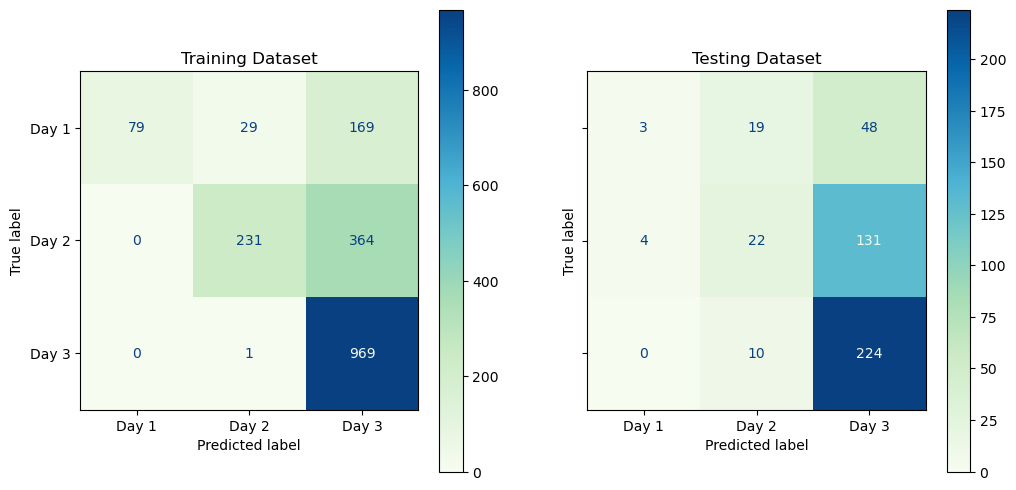

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, display_labels=['Day 1', 'Day 2', 'Day 3'], cmap='GnBu', ax=ax[0])
ax[0].set_title("Training Dataset")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=['Day 1', 'Day 2', 'Day 3'], cmap='GnBu', ax=ax[1])
ax[1].set_title("Testing Dataset")

plt.show()

In [59]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_test))


Accuracy: 0.5401301518438177


/Users/meghashakya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.5


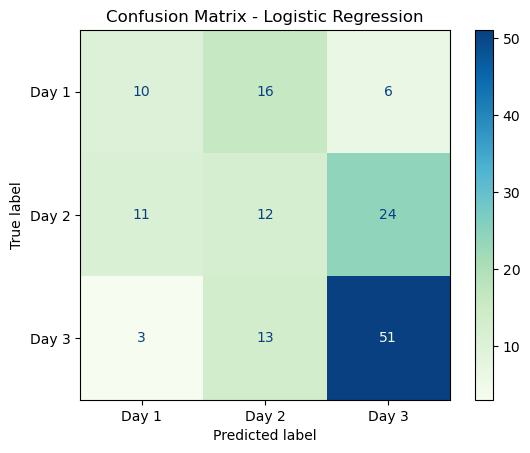

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['Day 1', 'Day 2', 'Day 3'], cmap='GnBu')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
 - I chose a Random Forest model with GridSearchCV because it combines predictions from different decision trees. Unlike a single decision tree that can easily overfit the training data, Random Forest reduces overfitting by averaging the results from multiple trees. I used GridSearchCV to tune its hyperparameters and find the most accurate version of the model.
 - What was your accuracy?
 My accuracy score is 54%.